In [2]:
using UMAP
using Makie
using XLSX
using VegaDatasets
using DataFrames
using MultivariateStats
using RDatasets
using StatsBase
using Statistics
using LinearAlgebra
using Plots
using ScikitLearn
using MLBase
using Distances

In [3]:
C = DataFrame(VegaDatasets.dataset("cars"))

Row,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
,String,Float64?,Int64,Float64,Int64?,Int64,Float64,String,String
1,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970-01-01,USA
2,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970-01-01,USA
3,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970-01-01,USA
4,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970-01-01,USA
5,ford torino,17.0,8,302.0,140,3449,10.5,1970-01-01,USA
6,ford galaxie 500,15.0,8,429.0,198,4341,10.0,1970-01-01,USA
7,chevrolet impala,14.0,8,454.0,220,4354,9.0,1970-01-01,USA
8,plymouth fury iii,14.0,8,440.0,215,4312,8.5,1970-01-01,USA
9,pontiac catalina,14.0,8,455.0,225,4425,10.0,1970-01-01,USA


In [4]:
dropmissing!(C)
M = Matrix(C[:,2:7])
names(C)

9-element Vector{String}:
 "Name"
 "Miles_per_Gallon"
 "Cylinders"
 "Displacement"
 "Horsepower"
 "Weight_in_lbs"
 "Acceleration"
 "Year"
 "Origin"

In [5]:
car_origin = C[:,:Origin]
carmap = labelmap(car_origin) #from MLBase
uniqueids = labelencode(carmap,car_origin)

392-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 2
 1
 1
 1
 3
 1
 1
 1

In [6]:
data = M
data = (data .- mean(data,dims = 1))./ std(data,dims=1)

392×6 Matrix{Float64}:
 -0.697747   1.48205    1.07591    0.663285   0.619748   -1.28362
 -1.08212    1.48205    1.48683    1.57258    0.842258   -1.46485
 -0.697747   1.48205    1.18103    1.18288    0.539692   -1.64609
 -0.953992   1.48205    1.04725    1.18288    0.53616    -1.28362
 -0.82587    1.48205    1.02813    0.923085   0.554997   -1.82732
 -1.08212    1.48205    2.24177    2.42992    1.60515    -2.00855
 -1.21024    1.48205    2.48068    3.00148    1.62045    -2.37102
 -1.21024    1.48205    2.34689    2.87158    1.57101    -2.55226
 -1.21024    1.48205    2.49023    3.13138    1.70404    -2.00855
 -1.08212    1.48205    1.86908    2.22208    1.02709    -2.55226
  ⋮                                                       ⋮
 -0.185255   0.309571   0.359199   0.195645  -0.167864   -0.304954
  1.09597   -0.862911  -0.481748  -0.220035  -0.368005   -0.594928
  1.60847   -0.862911  -0.567753  -0.531795  -0.715308   -0.92115
  0.455359  -0.862911  -0.414854  -0.375915  -0.0324748  

In [7]:
data'

6×392 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.697747  -1.08212   -0.697747  …   1.09597    0.583482   0.967851
  1.48205    1.48205    1.48205      -0.862911  -0.862911  -0.862911
  1.07591    1.48683    1.18103      -0.567753  -0.711097  -0.720653
  0.663285   1.57258    1.18288      -0.531795  -0.661694  -0.583754
  0.619748   0.842258   0.539692     -0.803605  -0.415097  -0.303253
 -1.28362   -1.46485   -1.64609   …  -1.4286     1.10867    1.39865

In [8]:
p = fit(PCA,data',maxoutdim=2)

PCA(indim = 6, outdim = 2, principalratio = 0.9194828785333571)

Pattern matrix (unstandardized loadings):
───────────────────────
         PC1        PC2
───────────────────────
1  -0.873037  -0.20899
2   0.942277   0.126601
3   0.97054    0.092613
4   0.94995   -0.141833
5   0.941156   0.244211
6  -0.638795   0.761967
───────────────────────

Importance of components:
─────────────────────────────────────────────
                                PC1       PC2
─────────────────────────────────────────────
SS Loadings (Eigenvalues)  4.78827   0.728631
Variance explained         0.798044  0.121439
Cumulative variance        0.798044  0.919483
Proportion explained       0.867927  0.132073
Cumulative proportion      0.867927  1.0
─────────────────────────────────────────────

In [9]:
P = projection(p)

6×2 Matrix{Float64}:
  0.398973  -0.244835
 -0.430615   0.148314
 -0.443531   0.108497
 -0.434122  -0.166158
 -0.430103   0.286095
  0.291926   0.892652

In [10]:
P'*(data[1,:]-mean(p))

2-element Vector{Float64}:
 -2.3230016965226925
 -0.5713519642644691

In [11]:
Yte = MultivariateStats.transform(p, data') #notice that Yte[:,1] is the same as P'*(data[1,:]-mean(p))

2×392 Matrix{Float64}:
 -2.323     -3.20196  -2.66658   -2.60214   …   1.22011  1.70921   1.86951
 -0.571352  -0.68187  -0.992744  -0.621975     -1.87471  0.632857  0.815607

In [12]:
Xr = reconstruct(p, Yte)

6×392 Matrix{Float64}:
 -0.786928  -1.11055  -0.820834  …   0.945785   0.526984   0.546196
  0.91558    1.27768   1.00103      -0.803445  -0.64215   -0.684075
  0.968334   1.34619   1.075        -0.744559  -0.689425  -0.740696
  1.1034     1.50334   1.32257      -0.218179  -0.847159  -0.947116
  0.835669   1.18209   0.862883     -1.06112   -0.554079  -0.570742
 -1.18816   -1.54341  -1.66462   …  -1.31728    1.06388    1.27381

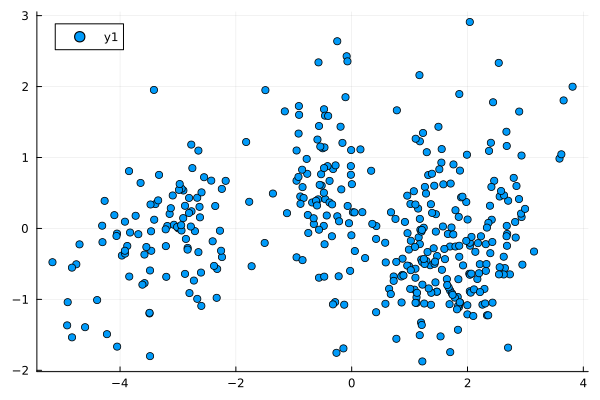

In [13]:
Plots.scatter(Yte[1,:],Yte[2,:])

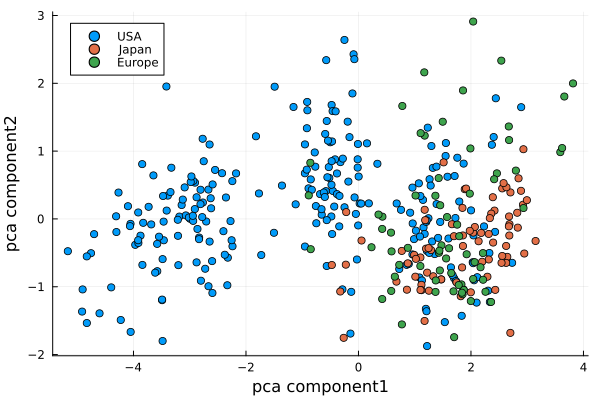

In [14]:
Plots.scatter(Yte[1,car_origin.=="USA"],Yte[2,car_origin.=="USA"],color=1,label="USA")
Plots.xlabel!("pca component1")
Plots.ylabel!("pca component2")
Plots.scatter!(Yte[1,car_origin.=="Japan"],Yte[2,car_origin.=="Japan"],color=2,label="Japan")
Plots.scatter!(Yte[1,car_origin.=="Europe"],Yte[2,car_origin.=="Europe"],color=3,label="Europe")

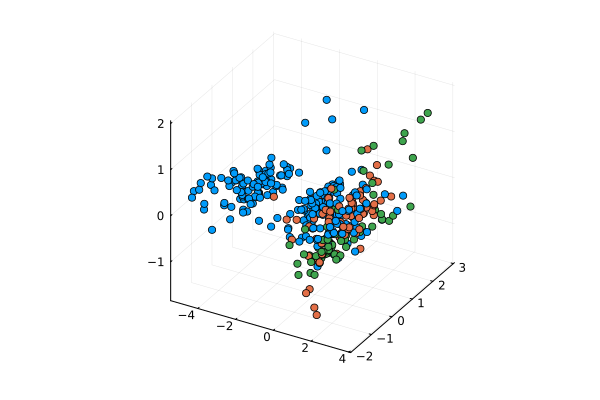

In [15]:
p = fit(PCA,data',maxoutdim=3)
Yte = MultivariateStats.transform(p, data')
scatter3d(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids,legend=false)

In [16]:
using GLMakie
scene = Makie.scatter(Yte[1,:],Yte[2,:],Yte[3,:],color=uniqueids)

In [17]:
display(scene)

GLMakie.Screen(...)

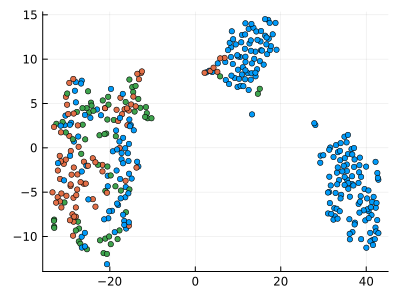

In [19]:
@sk_import manifold : TSNE
tfn = TSNE(n_components=2) #,perplexity=20.0,early_exaggeration=50)
Y2 = tfn.fit_transform(data);
Plots.scatter(Y2[:,1],Y2[:,2],color=uniqueids,legend=false,size=(400,300),markersize=3)

In [20]:
L = cor(data,data,dims=2)
embedding = umap(L, 2)

2×392 Matrix{Float64}:
 6.65574  7.22362  6.69038  6.78505  6.5961   …  -3.30731  -5.27473  -5.66008
 5.13216  5.06588  5.59766  5.0656   5.46835      2.30099  -4.27406  -4.12539

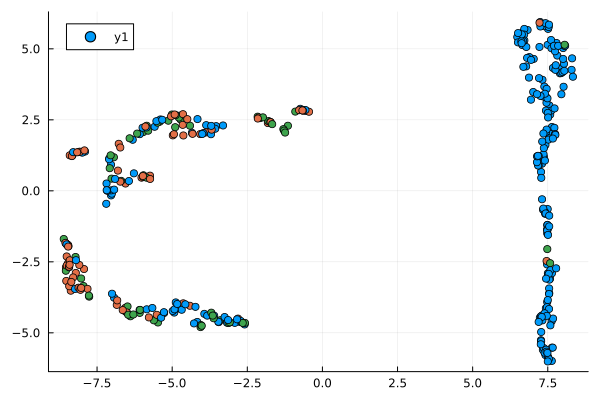

In [21]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)

In [22]:
L = pairwise(Euclidean(), data, data,dims=1) 
embedding = umap(-L, 2)

2×392 Matrix{Float64}:
 -7.37217   -8.40882  -7.97217   -7.8051    …   8.39933   5.4873    5.28946
 -0.404757  -3.14342  -0.914252  -0.929875     -2.64035  -1.97435  -2.1476

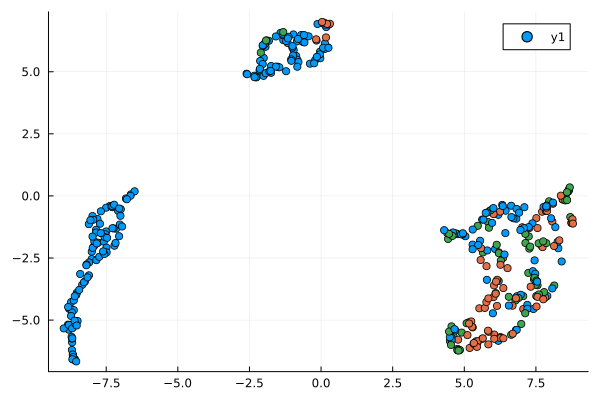

In [23]:
Plots.scatter(embedding[1,:],embedding[2,:],color=uniqueids)